# Étude de l'erreur sur l'énergie avec la formulation TOF dans le cas du SWARM 

In [36]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
savefig_path = os.path.join(lib_path, "figures/analyse_TOF/")
save_fig = True

In [2]:
from src.main import *
from src.plot_fields import *
from src.plot_stats import *

%matplotlib widget
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)
rc("font", size=18)
rc("legend", fontsize=16)
rc("figure", max_open_warning=80)
rc("text.latex", preamble=r"\usepackage{siunitx}")

In [3]:
n_max = 10**10

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [4]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_ref = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
markers = Bulles(phy_prop=phy_prop)
# Formulation = [Problem, ProblemConserv2]

n_lim = 10**8
t_fin = 0.02

# Étude numérique

## Étude en $\Delta x$ avec QUICK


Ref
===
dt fourier
1.0206747897317235e-06
Db / dx = 79
Liste des simus similaires : 
['../References/Ref, rk3, quick, dx = 1.50038e-05, dt = 1e-06_t_0.199999.pkl', '../References/Ref, rk3, quick, dx = 1.50038e-05, dt = 1e-06_t_0.200000.pkl']
Attention, les markers initiaux ne sont pas enregistrés dans la référence
Loading ======> ../References/Ref, rk3, quick, dx = 1.50038e-05, dt = 1e-06_t_0.200000.pkl
remaining time to compute : 0.000001

TOF
===
dt min
1.0206747897317235e-06
Db / dx = 79
Liste des simus similaires : 
['../References/TOF, rk3, quick, dx = 1.50038e-05, dt = 1e-06, cfl = 0.0136056_t_0.199999.pkl']
Loading ======> ../References/TOF, rk3, quick, dx = 1.50038e-05, dt = 1e-06, cfl = 0.0136056_t_0.199999.pkl
remaining time to compute : 0.000001

TOF
===
dt min
1.0206747897317235e-06
Db / dx = 59
Liste des simus similaires : 
['../References/TOF, rk3, quick, dx = 2.002e-05, dt = 1e-06, cfl = 0.0101965_t_0.199999.pkl']
Loading ======> ../References/TOF, rk3, quick, dx = 2.00

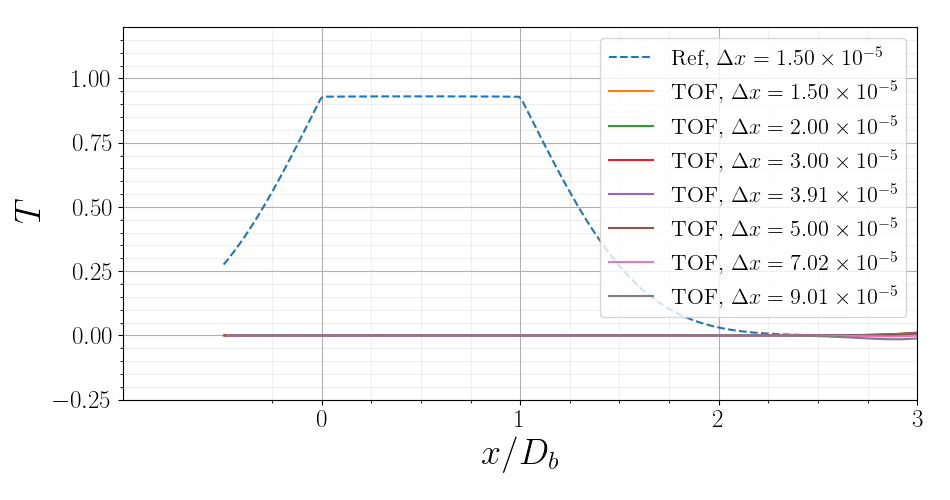

In [5]:
dx_list = [
    1.5 * 10**-5,
    2.0 * 10**-5,
    3.0 * 10**-5,
    3.9 * 10**-5,
    5.0 * 10**-5,
    7.0 * 10**-5,
    9.0 * 10**-5,
]  # 1.*10**-5, 3.*10**-5,  [5*10**-6, 1*10**-5, 3.9*10**-5, 7*10**-5, 10**-4]
t_fin = 0.2
plot = Plotter("decale", time=False, dx=True, zoom=(-1, 3), ispretty=True)

num_prop_ref = NumericalProperties(
    dx=min(dx_list), schema="quick", time_scheme="rk3", phy_prop=phy_prop
)
markers = Bulles(phy_prop=phy_prop, n_bulle=1)
prob_ref = Problem(
    get_T_creneau,
    markers=markers,
    num_prop=num_prop_ref,
    phy_prop=phy_prop_ref,
    name="Ref",
)
prob_ref.load_or_compute(
    t_fin=t_fin,
    n=min(n_max, n_lim),
    number_of_plots=1,
    plotter=[plot],
    ls="--",
)
dt_min = prob_ref.dt

perte_e_dx = []
dx_plot = []
probs = []

for dx in dx_list:
    num_prop = NumericalProperties(
        dx=dx, dt=dt_min, schema="quick", time_scheme="rk3", phy_prop=phy_prop
    )
    prob = Problem(get_T_creneau, markers=markers, num_prop=num_prop, phy_prop=phy_prop)
    t, e = prob.load_or_compute(
        t_fin=t_fin,
        n=min(n_max, n_lim),
        number_of_plots=1,
        plotter=[plot],
    )
    probs.append(prob)
    dx_plot.append(prob.num_prop.dx)
    perte_e_dx.append(e[-1] - e[0])

plot.ax.set_ylim(-0.25, 1.2)

if save_fig:
    plot.fig.savefig(savefig_path + "temperature_convgce_dx_quick.pdf")


$D_b / \Delta x = \num{79}$
dE*/dt* = -4.41665e-07

$D_b / \Delta x = \num{59}$
dE*/dt* = -4.9658e-07

$D_b / \Delta x = \num{39}$
dE*/dt* = -5.70298e-07

$D_b / \Delta x = \num{30}$
dE*/dt* = -6.13236e-07

$D_b / \Delta x = \num{23}$
dE*/dt* = -6.44504e-07

$D_b / \Delta x = \num{17}$
dE*/dt* = -7.01195e-07

$D_b / \Delta x = \num{13}$
dE*/dt* = -7.44252e-07


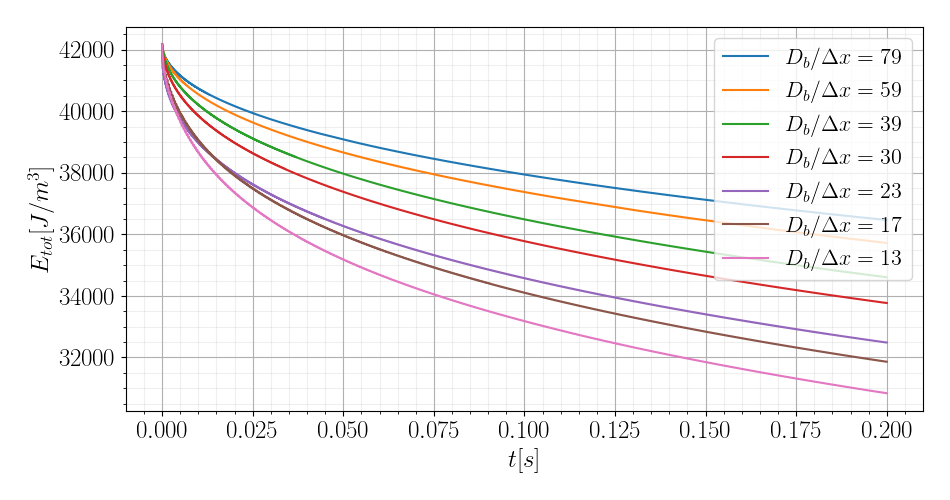

In [6]:
plot_en = EnergiePlot()
for pb in probs:
    plot_en.plot_pb(
        pb, label=r"$D_b / \Delta x = \num{%.2i}$" % (pb.bulles.diam / pb.num_prop.dx,)
    )
if save_fig:
    plot_en.fig.savefig(savefig_path + "perte_energie_fonc_t_convgce_dx_quick.pdf")

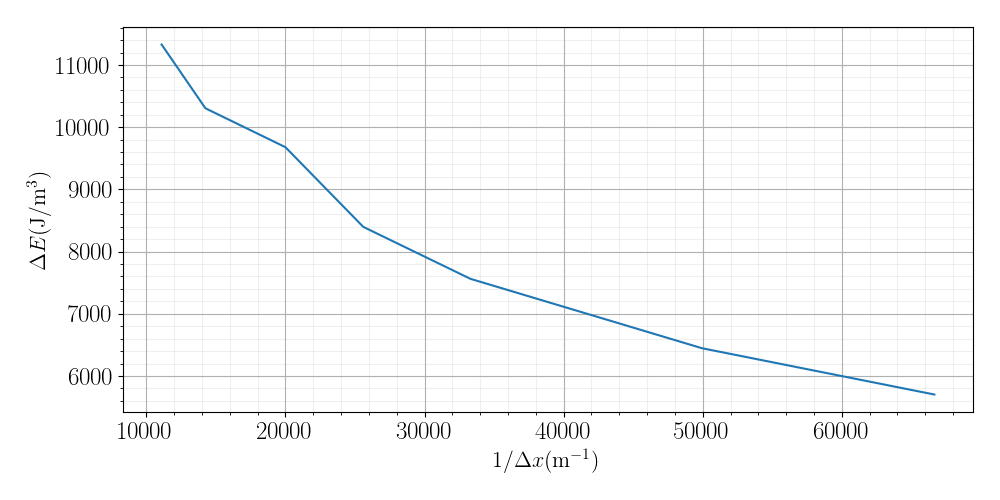

In [7]:
plt.figure()
plt.plot(1.0 / np.array(dx_plot), np.abs(np.array(perte_e_dx)) / (0.02 * 0.005 * 0.005))
plt.xlabel(r"$1/\Delta x$(m$^{-1}$)", size=16)
plt.ylabel(r"$\Delta E$(J/m$^3$)", size=16)
plt.grid(b=True, which="major")
plt.minorticks_on()
plt.grid(b=True, which="minor", alpha=0.2)
plt.tight_layout()
if save_fig:
    plt.savefig(savefig_path + "perte_energie_convgce_dx_quick.pdf")

-0.386334635899293 0.9909317788797399


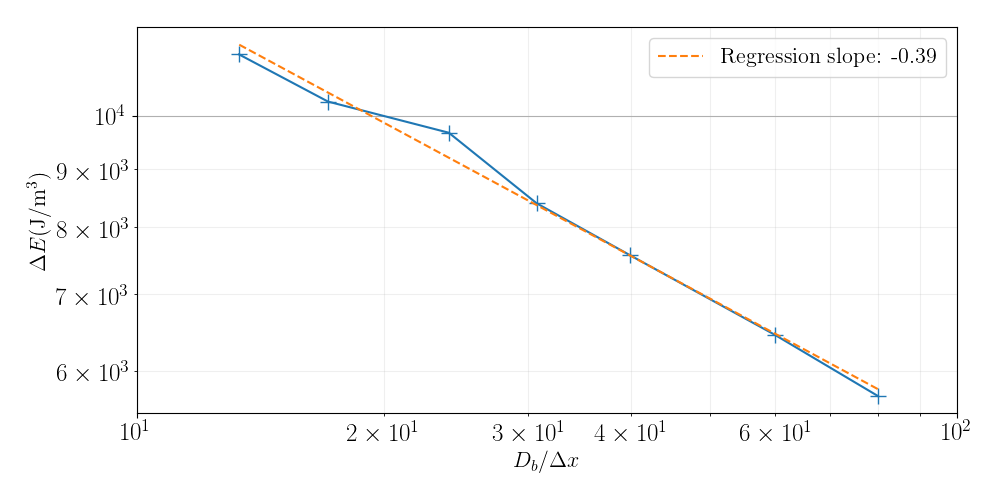

In [8]:
plt.figure()
x = np.log10(3.9 * 10**-5 / np.array(dx_plot))
y = np.log10(np.abs(np.array(perte_e_dx) / e[0]))

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, r_value**2)
linreg = (
    e[0]
    / (0.02 * 0.005 * 0.005)
    * 10**intercept
    * (3.9 * 10**-5 / np.array(dx_plot)) ** slope
)
plt.loglog(
    0.02 * 0.06 / np.array(dx_plot),
    np.abs(np.array(perte_e_dx)) / (0.02 * 0.005 * 0.005),
    marker="+",
    markersize=12,
)
plt.loglog(
    0.02 * 0.06 / np.array(dx_plot),
    linreg,
    "--",
    label=r"Regression slope: %.2f" % slope,
)
plt.xlabel(r"$D_b/\Delta x$", size=16)
plt.ylabel(r"$\Delta E$(J/m$^3$)", size=16)
# plt.grid(b=True, which='major')
plt.xlim(10, 100)
plt.legend()
plt.minorticks_on()
plt.grid(b=True, which="major")
plt.grid(b=True, which="minor", alpha=0.2)
plt.tight_layout()
if save_fig:
    plt.savefig(savefig_path + "perte_energie_convgce_dx_log_quick.pdf")

In [9]:
E0 = 42000.0
dx0 = 3.9 * 10**-5
dE0 = 6900
dx_lim = dx0 * (5.0 * E0 / (100 * dE0) * 10 ** (-intercept)) ** (-1.0 / slope)
print(dx_lim)
print(0.02 * 0.06 / dx_lim)

0.0001181983482132992
10.152426139107254


## Étude en $\Delta x$ avec WENO


Ref
===
dt fourier
1.0206747897317235e-06
Db / dx = 79
Liste des simus similaires : 
['../References/Ref, rk3, weno, dx = 1.50038e-05, dt = 1e-06_t_0.200000.pkl']
Attention, les markers initiaux ne sont pas enregistrés dans la référence
Loading ======> ../References/Ref, rk3, weno, dx = 1.50038e-05, dt = 1e-06_t_0.200000.pkl
remaining time to compute : 0.000001

TOF
===
dt min
1.0206747897317235e-06
Db / dx = 79
Liste des simus similaires : 
['../References/TOF, rk3, weno, dx = 1.50038e-05, dt = 1e-06, cfl = 0.0136056_t_0.200000.pkl']
Attention, les markers initiaux ne sont pas enregistrés dans la référence
Loading ======> ../References/TOF, rk3, weno, dx = 1.50038e-05, dt = 1e-06, cfl = 0.0136056_t_0.200000.pkl
remaining time to compute : 0.000001

TOF
===
dt min
1.0206747897317235e-06
Db / dx = 59
Liste des simus similaires : 
['../References/TOF, rk3, weno, dx = 2.002e-05, dt = 1e-06, cfl = 0.0101965_t_0.200000.pkl']
Attention, les markers initiaux ne sont pas enregistrés dans la r

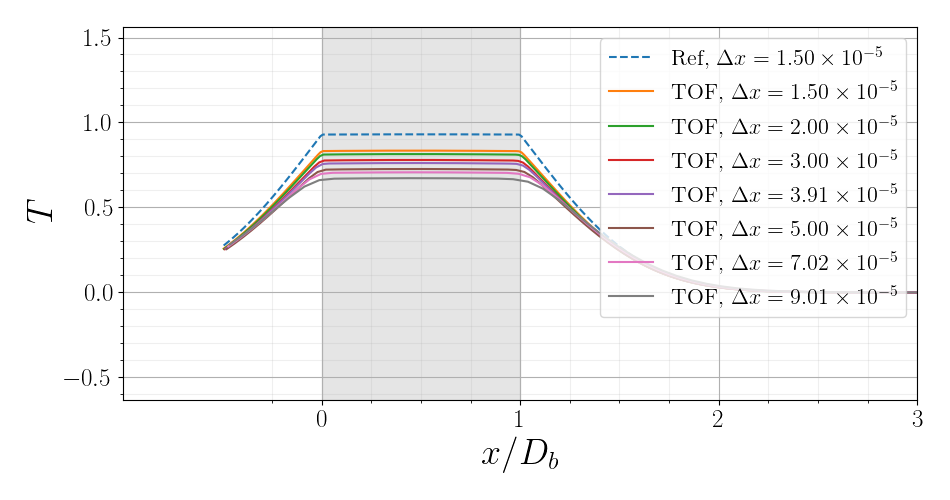

In [10]:
dx_list = [
    1.5 * 10**-5,
    2.0 * 10**-5,
    3.0 * 10**-5,
    3.9 * 10**-5,
    5.0 * 10**-5,
    7.0 * 10**-5,
    9.0 * 10**-5,
]  # 1.*10**-5, 3.*10**-5,  [5*10**-6, 1*10**-5, 3.9*10**-5, 7*10**-5, 10**-4]
t_fin = 0.2
plot = Plotter("decale", time=False, dx=True, zoom=(-1, 3), ispretty=True)
num_prop_ref = NumericalProperties(
    dx=min(dx_list), schema="weno", time_scheme="rk3", phy_prop=phy_prop
)
markers = Bulles(phy_prop=phy_prop, n_bulle=1)
prob_ref = Problem(
    get_T_creneau,
    markers=markers,
    num_prop=num_prop_ref,
    phy_prop=phy_prop_ref,
    name="Ref",
)
prob_ref.load_or_compute(
    t_fin=t_fin,
    n=min(n_max, n_lim),
    number_of_plots=1,
    debug=None,
    plotter=[plot],
    ls="--",
)
dt_min = prob_ref.dt
perte_e_dx = []
dx_plot = []
probs_weno = []

for dx in dx_list:
    num_prop = NumericalProperties(
        dx=dx, dt=dt_min, schema="weno", time_scheme="rk3", phy_prop=phy_prop
    )
    #     perte_e_dx.append(compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin))
    prob = Problem(get_T_creneau, markers=markers, num_prop=num_prop, phy_prop=phy_prop)
    t, e = prob.load_or_compute(
        t_fin=t_fin,
        n=min(n_max, n_lim),
        number_of_plots=1,
        debug=None,
        plotter=[plot],
    )
    probs_weno.append(prob)
    perte_e_dx.append(e[0] - e[-1])
    dx_plot.append(num_prop.dx)
    if dx == 3.9 * 10**-5:
        DE0 = e[0] - e[-1]

if save_fig:
    plot.fig.savefig(savefig_path + "temperature_convgce_dx_weno.pdf")


$D_b / \Delta x = \num{79}$
dE*/dt* = -3.28829e-07

$D_b / \Delta x = \num{59}$
dE*/dt* = -3.95836e-07

$D_b / \Delta x = \num{39}$
dE*/dt* = -4.93293e-07

$D_b / \Delta x = \num{30}$
dE*/dt* = -5.60308e-07

$D_b / \Delta x = \num{23}$
dE*/dt* = -6.08096e-07

$D_b / \Delta x = \num{17}$
dE*/dt* = -6.84353e-07

$D_b / \Delta x = \num{13}$
dE*/dt* = -7.21466e-07


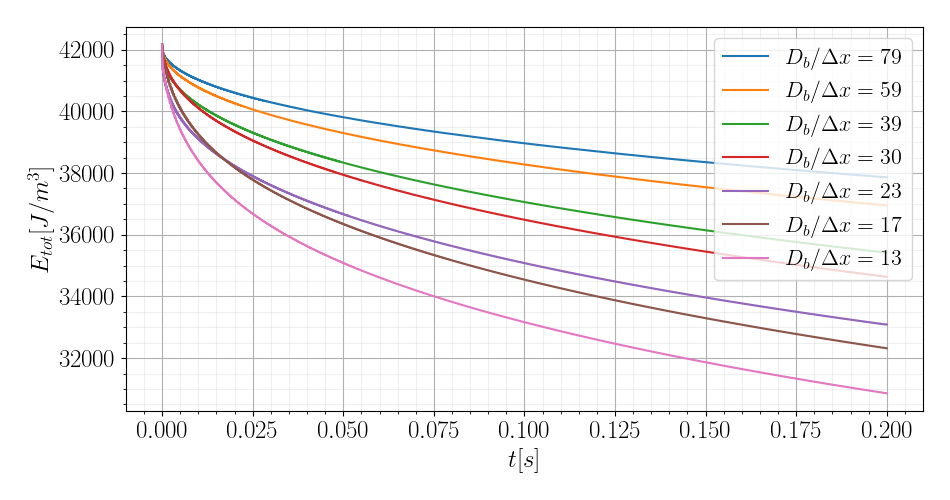

In [11]:
plot_en_weno = EnergiePlot()
for pb in probs_weno:
    plot_en_weno.plot_pb(
        pb, label=r"$D_b / \Delta x = \num{%.2i}$" % (pb.bulles.diam / pb.num_prop.dx,)
    )
if save_fig:
    plot_en_weno.fig.savefig(savefig_path + "perte_energie_fonc_t_convgce_dx_weno.pdf")

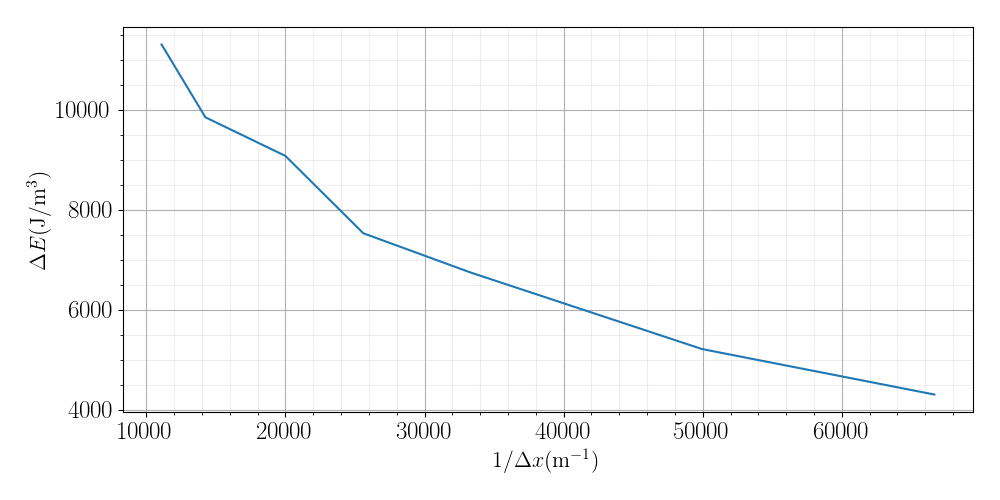

In [12]:
plt.figure()
plt.plot(1.0 / np.array(dx_plot), np.abs(perte_e_dx) / (0.02 * 0.005 * 0.005))
plt.xlabel(r"$1/\Delta x$(m$^{-1}$)", size=16)
plt.ylabel(r"$\Delta E$(J/m$^3$)", size=16)
plt.grid(b=True, which="major")
plt.minorticks_on()
plt.grid(b=True, which="minor", alpha=0.2)
plt.tight_layout()
if save_fig:
    plt.savefig(savefig_path + "perte_energie_convgce_dx_weno.pdf")

-0.5331739714015249 0.9869615529303245


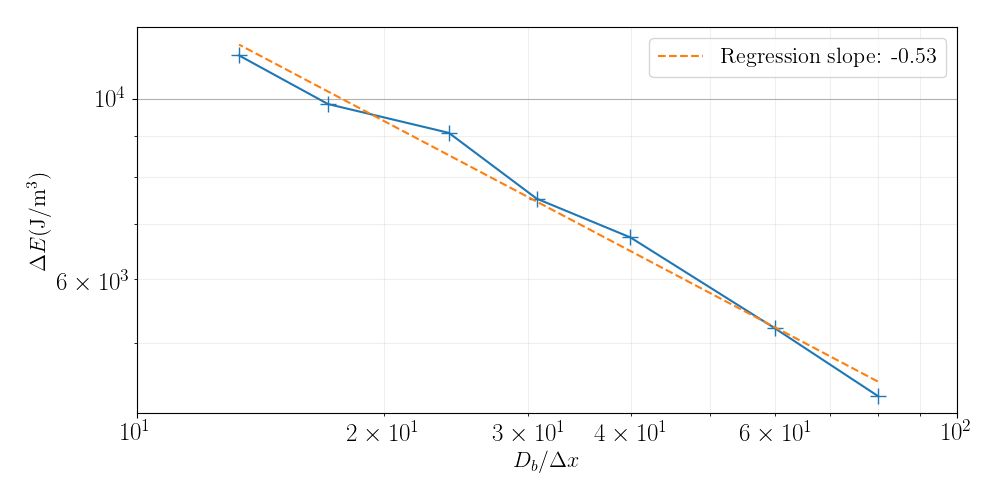

In [13]:
plt.figure()
x = np.log10(3.9 * 10**-5 / np.array(dx_plot))
y = np.log10(np.abs(np.array(perte_e_dx) / DE0))

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, r_value**2)
linreg = (
    DE0
    / (0.02 * 0.005 * 0.005)
    * 10**intercept
    * (3.9 * 10**-5 / np.array(dx_plot)) ** slope
)
plt.loglog(
    0.02 * 0.06 / np.array(dx_plot),
    np.abs(perte_e_dx) / (0.02 * 0.005 * 0.005),
    marker="+",
    markersize=12,
)
plt.loglog(
    0.02 * 0.06 / np.array(dx_plot),
    linreg,
    "--",
    label=r"Regression slope: %.2f" % slope,
)
plt.xlabel(r"$D_b/\Delta x$", size=16)
plt.ylabel(r"$\Delta E$(J/m$^3$)", size=16)
# plt.grid(b=True, which='major')
plt.xlim(10, 100)
plt.legend()
plt.minorticks_on()
plt.grid(b=True, which="major")
plt.grid(b=True, which="minor", alpha=0.2)
plt.tight_layout()
if save_fig:
    plt.savefig(savefig_path + "perte_energie_convgce_dx_log_weno.pdf")

In [14]:
E0 = 42000.0
dx0 = 3.9 * 10**-5
dE0 = 6900
dx_lim = dx0 * (5.0 * E0 / (100 * dE0)) ** (1 / 0.569)
print(dx_lim)
print(0.02 / dx_lim)

4.8206281208613194e-06
4148.836935471083


## Étude en $\Delta t$

Ici on ne change pas $\Delta x$, mais on diminue dt_min pour qu'il soit contraignant


Ref
===
dt min
7e-07
Db / dx = 17
Liste des simus similaires : 
['../References/Ref, euler, weno, dx = 7.01754e-05, dt = 7e-07_t_0.100000.pkl']
Attention, les markers initiaux ne sont pas enregistrés dans la référence
Loading ======> ../References/Ref, euler, weno, dx = 7.01754e-05, dt = 7e-07_t_0.100000.pkl
remaining time to compute : 0.000000

TOF
===
dt min
2e-05
Db / dx = 17
Liste des simus similaires : 
['../References/TOF, rk3, quick, dx = 7.01754e-05, dt = 2e-05, cfl = 0.057_t_0.100000.pkl']
Attention, les markers initiaux ne sont pas enregistrés dans la référence
Loading ======> ../References/TOF, rk3, quick, dx = 7.01754e-05, dt = 2e-05, cfl = 0.057_t_0.100000.pkl
remaining time to compute : -0.000000

TOF
===
dt min
1.5000000000000002e-05
Db / dx = 17
Liste des simus similaires : 
['../References/TOF, rk3, quick, dx = 7.01754e-05, dt = 1.5e-05, cfl = 0.04275_t_0.100000.pkl']
Attention, les markers initiaux ne sont pas enregistrés dans la référence
Loading ======> ../Referenc

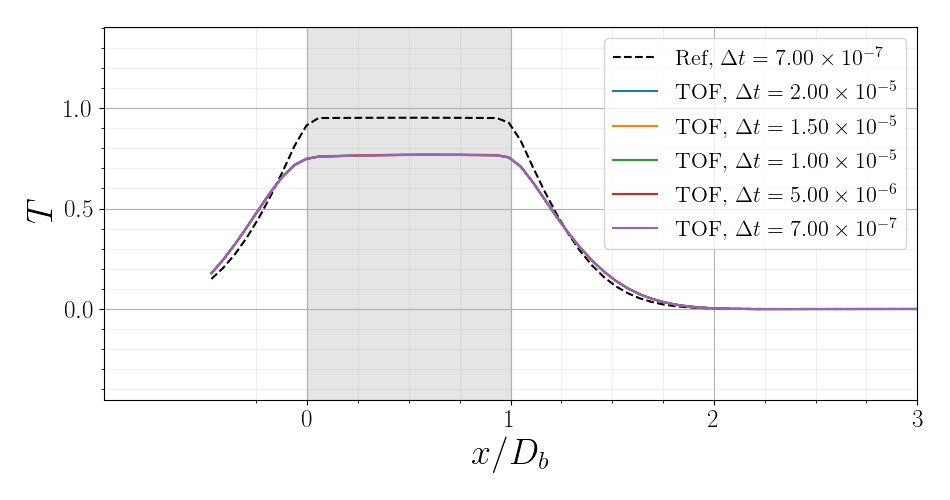

In [15]:
dt_min_list = [2 * 10**-5, 1.5 * 10**-5, 1 * 10**-5, 5 * 10**-6, 7.0 * 10**-7]
t_fin = 0.1
plot = Plotter("decale", time=False, dx=False, dt=True, zoom=(-1, 3), ispretty=True)
num_prop_ref = NumericalProperties(
    dx=7.0 * 10**-5,
    dt=min(dt_min_list),
    schema="weno",
    time_scheme="euler",
    phy_prop=phy_prop,
)
markers = Bulles(phy_prop=phy_prop, n_bulle=1)
prob_ref = Problem(
    get_T_creneau,
    markers=markers,
    num_prop=num_prop_ref,
    phy_prop=phy_prop_ref,
    name="Ref",
)
prob_ref.load_or_compute(
    t_fin=t_fin,
    n=min(n_max, n_lim),
    number_of_plots=1,
    debug=None,
    plotter=[plot],
    ls="--",
    c="k",
)
dt_min = prob_ref.dt
perte_e_dt = []
dt_plot = []
probs_dt = []

for dt in dt_min_list:
    num_prop = NumericalProperties(
        dx=7.0 * 10**-5, dt=dt, schema="quick", time_scheme="rk3", phy_prop=phy_prop
    )
    prob = Problem(get_T_creneau, markers=markers, num_prop=num_prop, phy_prop=phy_prop)
    t, e = prob.load_or_compute(
        t_fin=t_fin,
        n=min(n_max, n_lim),
        number_of_plots=1,
        debug=None,
        plotter=[plot],
    )
    probs_dt.append(prob)
    perte_e_dt.append(e[0] - e[-1])
    dt_plot.append(prob.dt)
    if dt == dt_min:
        DE0 = e[0] - e[-1]

if save_fig:
    plot.fig.savefig(savefig_path + "temperature_convgce_dt.pdf")


$\Delta t = \num{2.00e-05}\,\si{s}$
dE*/dt* = -2.25433e-05

$\Delta t = \num{1.50e-05}\,\si{s}$
dE*/dt* = -1.69456e-05

$\Delta t = \num{1.00e-05}\,\si{s}$
dE*/dt* = -1.13159e-05

$\Delta t = \num{5.00e-06}\,\si{s}$
dE*/dt* = -5.66434e-06

$\Delta t = \num{7.00e-07}\,\si{s}$
dE*/dt* = -7.93335e-07


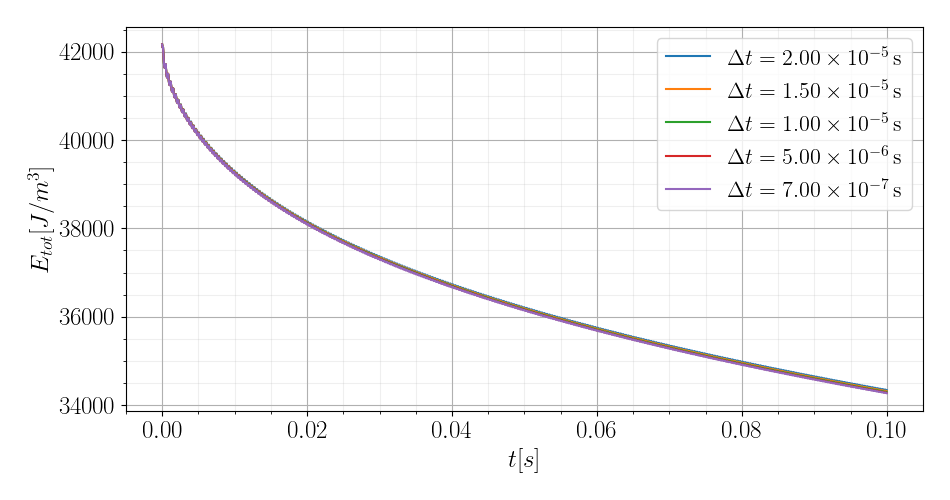

In [32]:
plot_en_dt = EnergiePlot()
for pb in probs_dt:
    plot_en_dt.plot_pb(pb, label=r"$\Delta t = \num{%.2e}\,\si{s}$" % (pb.dt,))
if save_fig:
    plot_en_dt.fig.savefig(savefig_path + "perte_energie_fonc_t_convgce_dt.pdf")

-3598652.9649364552 7908.964939144752 0.9729404285084825


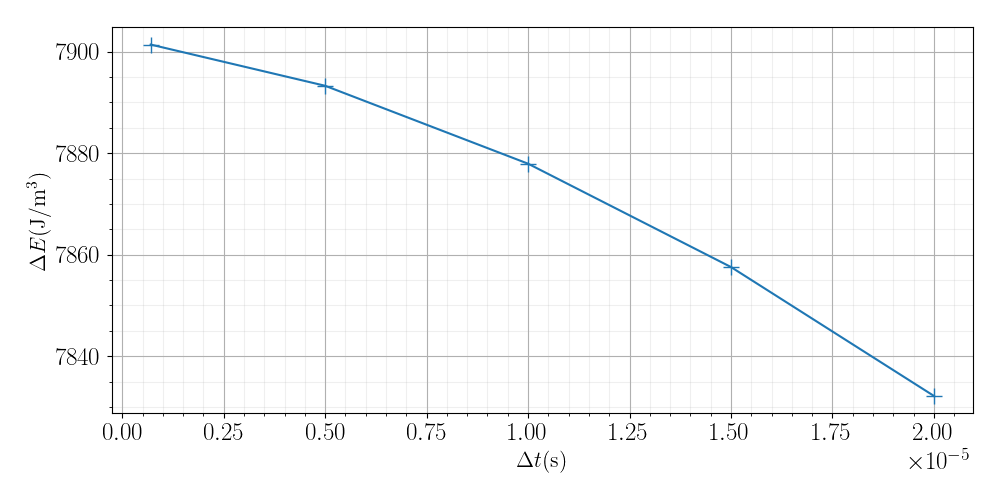

In [17]:
plt.figure()
x = np.array(dt_plot)
y = np.abs(perte_e_dt) / (0.02 * 0.005 * 0.005)
plt.plot(x, y, marker="+", markersize=12)
plt.xlabel(r"$\Delta t$(s)", size=16)
plt.ylabel(r"$\Delta E$(J/m$^3$)", size=16)
plt.grid(b=True, which="major")
plt.minorticks_on()
plt.grid(b=True, which="minor", alpha=0.2)
plt.tight_layout()
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept, r_value**2)
if save_fig:
    plt.savefig(savefig_path + "perte_energie_convgce_dt.pdf")

0.0022174500019240314 0.6944903911887997


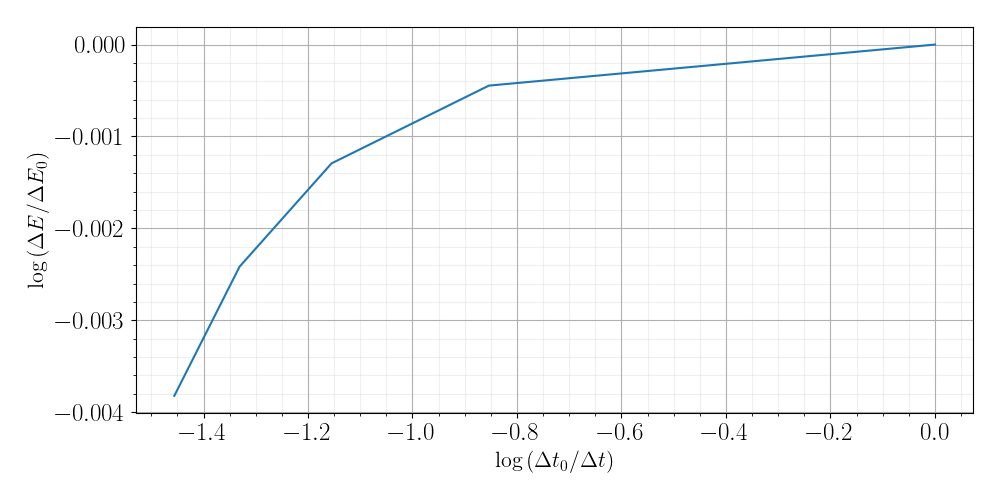

In [18]:
plt.figure()
x = np.log10(dt_plot[-1] / np.array(dt_plot))
y = np.log10(np.abs(perte_e_dt) / DE0)
plt.plot(x, y)
plt.xlabel(r"$\log{(\Delta t_0 / \Delta t)}$", size=16)
plt.ylabel(r"$\log{(\Delta E/\Delta E_0)}$", size=16)
plt.grid(b=True, which="major")
plt.minorticks_on()
plt.grid(b=True, which="minor", alpha=0.2)
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, r_value**2)
plt.tight_layout()
if save_fig:
    plt.savefig(savefig_path + "perte_energie_convgce_dt_log.pdf")

On n'observe pas de différence notable entre les simulations. Cela laisse à penser que seul le maillage spatial permet de diminuer les pertes d'énergie.

Essayons d'analyser les sources de perte d'énergie.


# Étude qualitative

## Pertes en diffusion pure


TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
Liste des simus similaires : 
[]


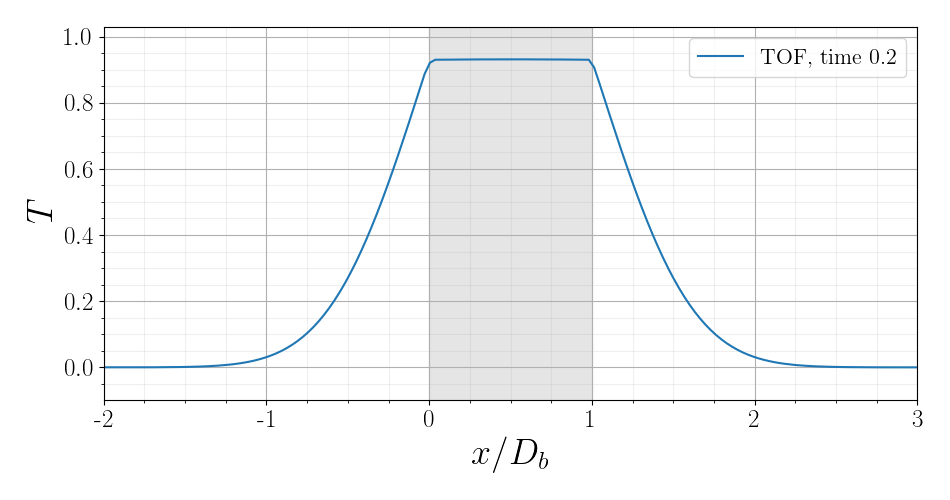

In [19]:
t_fin = 0.2
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="quick", time_scheme="rk3", phy_prop=phy_prop
)
markers = Bulles(phy_prop=phy_prop, n_bulle=1)
# markers.shift(0.01)

pb_sans_conv = Problem(get_T_creneau, markers, phy_prop=phy_prop_ref, num_prop=num_prop)
plotter = Plotter("classic", ispretty=True, zoom=(-2.0, 3.0))

_, _ = pb_sans_conv.load_or_compute(
    t_fin=t_fin, n=min(n_max, n_lim), number_of_plots=1, plotter=[plotter]
)
# compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)


TOF
===
dE*/dt* = -1.58881e-08


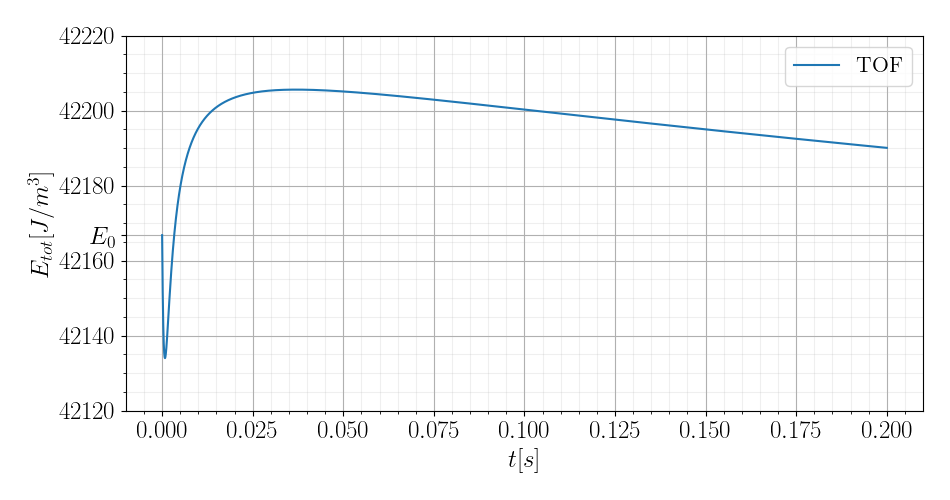

In [20]:
plot_en_diff = EnergiePlot()
plot_en_diff.plot_pb(pb_sans_conv)
plot_en_diff.add_E0()

## Étude avec différents rapports de convection / diffusion (en augmentant la vitesse de convection)


TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
Liste des simus similaires : 
['../References/TOF_etude_v_0_t_1.000000.pkl']
Attention, les markers initiaux ne sont pas enregistrés dans la référence
Loading ======> ../References/TOF_etude_v_0_t_1.000000.pkl
remaining time to compute : 0.000003

TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
Liste des simus similaires : 
['../References/TOF_etude_v_0.01_t_1.000000.pkl']
Attention, les markers initiaux ne sont pas enregistrés dans la référence
Loading ======> ../References/TOF_etude_v_0.01_t_1.000000.pkl
remaining time to compute : 0.000003

TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
Liste des simus similaires : 
['../References/TOF_etude_v_0.02_t_1.000000.pkl']
Attention, les markers initiaux ne sont pas enregistrés dans la référence
Loading ======> ../References/TOF_etude_v_0.02_t_1.000000.pkl
remaining time to compute : 0.000003

TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
Liste des simus similaires 

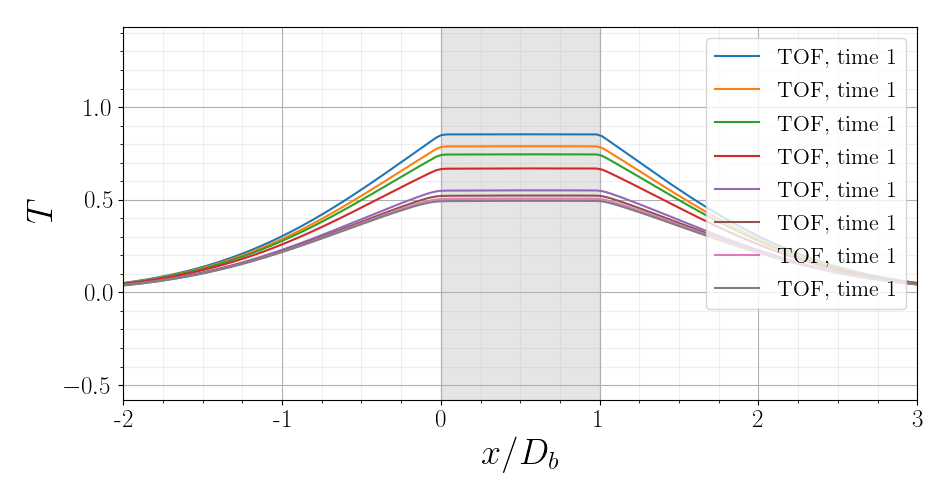

In [21]:
t_fin = 1.0
plotter = Plotter("decale", ispretty=True, zoom=(-2.0, 3.0))
markers = Bulles(n_bulle=1, alpha=0.06, a_i=357.0, Delta=0.02)
# markers.shift(0.01)

v_list = [0.0, 0.01, 0.02, 0.05, 0.2, 0.3, 0.4, 0.5]  #
probs_v = []
for v in v_list:
    phy_prop = PhysicalProperties(
        Delta=0.02,
        v=v,
        dS=0.005**2,
        lda1=5.5 * 10**-2,
        lda2=15.5,
        rho_cp1=70278.0,
        rho_cp2=702780.0,
        diff=1.0,
        alpha=0.06,
        a_i=357.0,
    )
    num_prop = NumericalProperties(
        dx=3.9 * 10**-5, schema="quick", time_scheme="rk3", phy_prop=phy_prop
    )

    pb_differents_v = Problem(
        get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop
    )
    _, _ = pb_differents_v.load_or_compute(
        pb_name="TOF_etude_v_%.2g" % v,
        t_fin=t_fin,
        n=n_max,
        number_of_plots=1,
        plotter=[plotter],
    )
    probs_v.append(pb_differents_v)
# compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

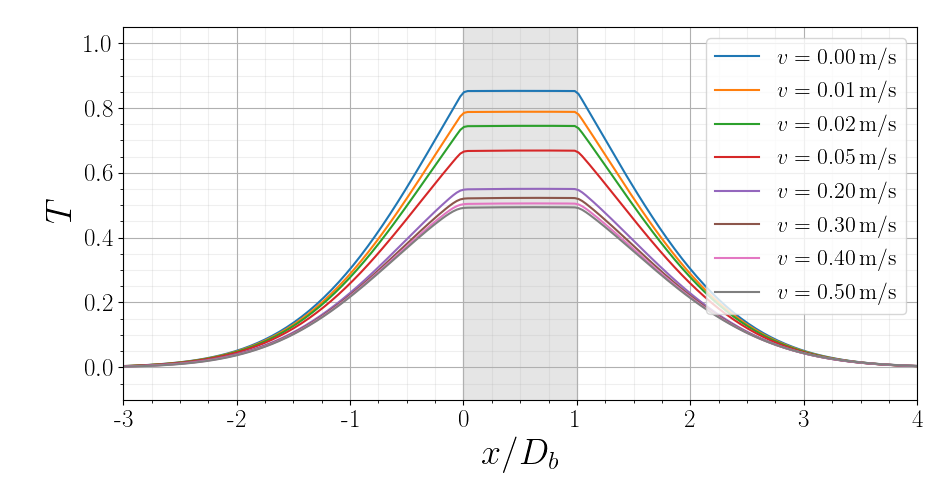

In [37]:
plot = Plotter("decale", ispretty=True, zoom=(-3.0, 4.0))
for pb in probs_v:
    plot.plot(pb, label=r"$v = \num{%.2f}\,\si{m/s}$" % pb.phy_prop.v)
plot.ax.set_ylim((-0.1, 1.05))
if save_fig:
    plot.fig.savefig(savefig_path + "temperature_etude_v.pdf")


$v = \num{0.00}\,\si{m/s}$
dE*/dt* = -1.00478e-08

$v = \num{0.01}\,\si{m/s}$
dE*/dt* = -3.31032e-07

$v = \num{0.02}\,\si{m/s}$
dE*/dt* = -5.35304e-07

$v = \num{0.05}\,\si{m/s}$
dE*/dt* = -8.61959e-07

$v = \num{0.20}\,\si{m/s}$
dE*/dt* = -1.26274e-06

$v = \num{0.30}\,\si{m/s}$
dE*/dt* = -1.33022e-06

$v = \num{0.40}\,\si{m/s}$
dE*/dt* = -1.36368e-06

$v = \num{0.50}\,\si{m/s}$
dE*/dt* = -1.38188e-06


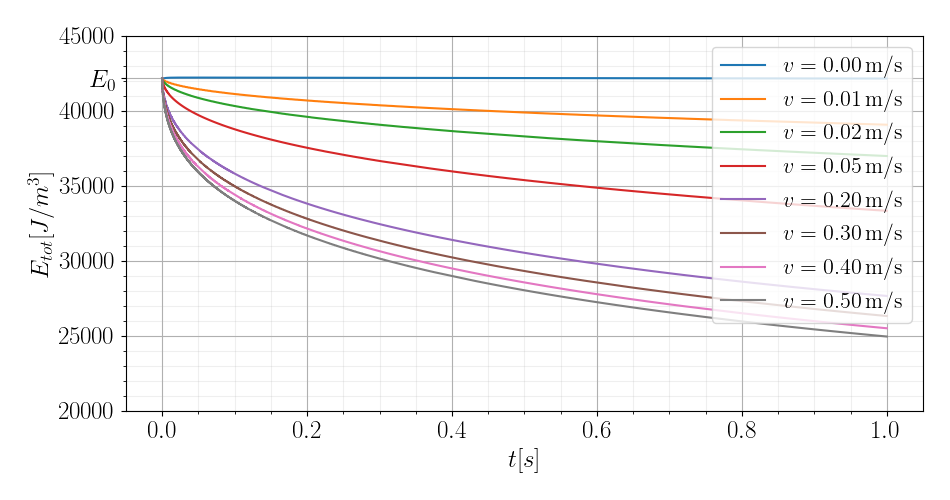

In [38]:
plot_en_v = EnergiePlot()
for pb in probs_v:
    plot_en_v.plot_pb(pb, label=r"$v = \num{%.2f}\,\si{m/s}$" % pb.phy_prop.v)
plot_en_v.add_E0()
if save_fig:
    plot_en_v.fig.savefig(savefig_path + "energie_etude_v.pdf")

74.45703398309253 10.363113826773908 0.8225982469999857


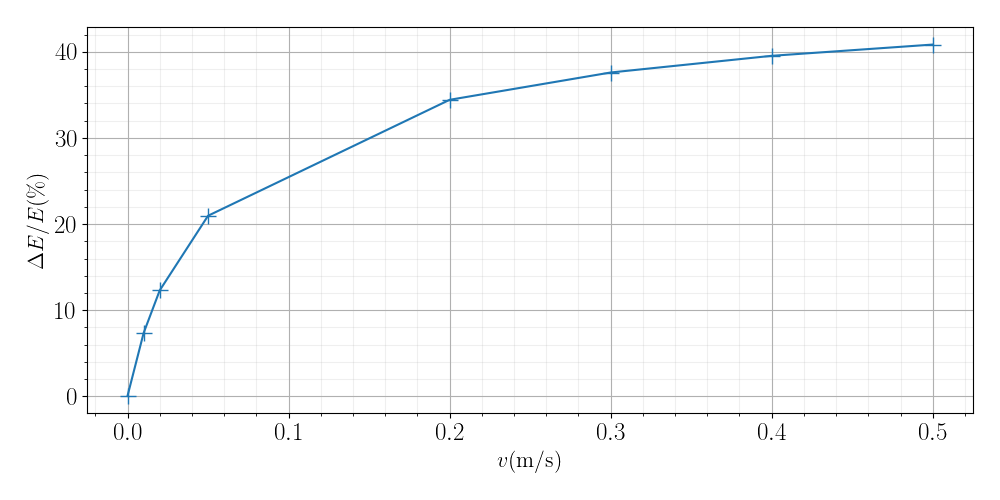

In [24]:
plt.figure()
x = np.array(v_list)
perte_e_rel = [(pb.E[-1] - pb.E[0]) / pb.E[0] for pb in probs_v]
y = np.abs(perte_e_rel) * 100
plt.plot(x, y, marker="+", markersize=12)
plt.xlabel(r"$v$(m/s)", size=16)
plt.ylabel(r"$\Delta E / E$(\%)", size=16)
plt.grid(b=True, which="major")
plt.minorticks_on()
plt.grid(b=True, which="minor", alpha=0.2)
plt.tight_layout()
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept, r_value**2)
if save_fig:
    plt.savefig(savefig_path + "energie_f_v.pdf")

## Étude avec différents rapports de convection / diffusion (en augmentant la vitesse de convection) à distance parcourue constante


$v = \num{0.01}\,\si{m/s}$
dE*/dt* = -3.31032e-07

$v = \num{0.02}\,\si{m/s}$
dE*/dt* = -5.35304e-07

$v = \num{0.05}\,\si{m/s}$
dE*/dt* = -8.61959e-07

$v = \num{0.20}\,\si{m/s}$
dE*/dt* = -1.26274e-06

$v = \num{0.30}\,\si{m/s}$
dE*/dt* = -1.33022e-06

$v = \num{0.40}\,\si{m/s}$
dE*/dt* = -1.36368e-06

$v = \num{0.50}\,\si{m/s}$
dE*/dt* = -1.38188e-06


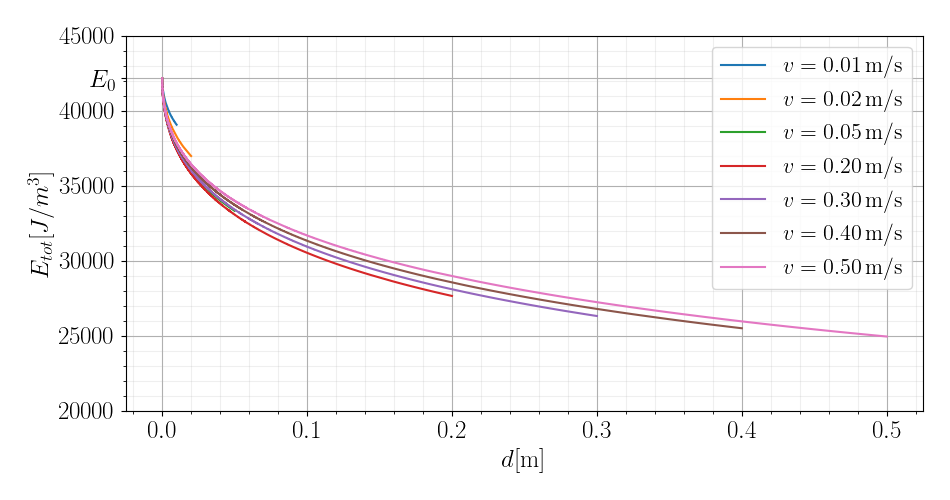

In [40]:
plot_en_v = EnergiePlot()
plot_en_v.ax.set_xlabel(r"$d$[m]")

for pb in probs_v[1:]:
    plot_en_v.plot(
        pb.t * pb.phy_prop.v,
        pb.E / (pb.phy_prop.Delta * pb.phy_prop.dS),
        label=r"$v = \num{%.2f}\,\si{m/s}$" % pb.phy_prop.v,
    )
plot_en_v.add_E0()
if save_fig:
    plot_en_v.fig.savefig(savefig_path + "energie_etude_v_f_d.pdf")

## Perte d'énergie en convection pure


TOF
===
dt cfl
1.7513134851138353e-05
Db / dx = 34


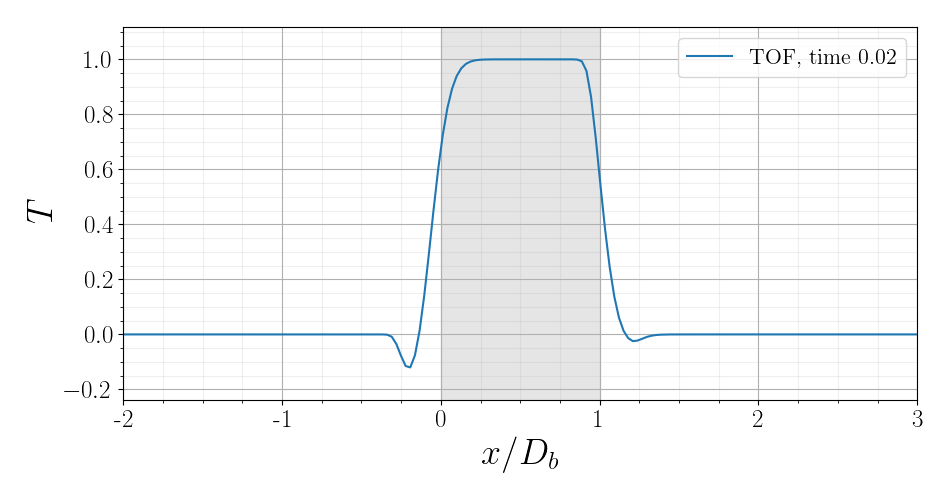

In [26]:
t_fin = 0.02
plotter = Plotter("decale", ispretty=True, zoom=(-2.0, 3.0))
markers = Bulles(n_bulle=1, alpha=0.06, a_i=357.0, Delta=0.02)
# markers.shift(0.01)

phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=3.5 * 10**-5,
    fo=10**10,
    cfl=0.1,
    schema="quick",
    time_scheme="rk3",
    phy_prop=phy_prop,
)

prob_conv_pure = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)

_, _ = prob_conv_pure.timestep(
    t_fin=t_fin, n=n_max, number_of_plots=1, plotter=[plotter]
)
# compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

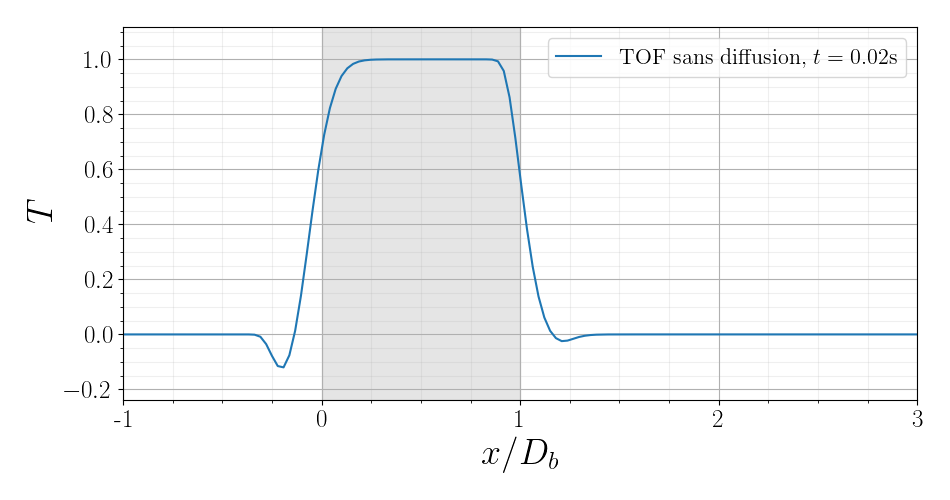

In [27]:
plot = Plotter("decale", ispretty=True, zoom=(-1.0, 3.0))
plot.plot(
    prob_conv_pure, label=r"TOF sans diffusion, $t=\num{%g}$s" % prob_conv_pure.time
)
if save_fig:
    plot.fig.savefig(savefig_path + "temperature_conv_pure.pdf")

## Étude selon les schémas numériques

In [28]:
Schemas = ["upwind", "center", "weno", "weno upwind"]
Time_scheme = ["euler", "rk4"]


def compare_energy_schema(schemas, form, time_scheme, phy_prop, markers, t_fin):
    fig1, ax1 = plt.subplots(1)
    ax1.set_title("Énergie en fonction du temps")
    for schem in schemas:
        for ts in time_scheme:
            a = Plotter("decale")
            num_prop = NumericalProperties(
                dx=3.9 * 10**-5, schema=schem, time_scheme=ts, phy_prop=phy_prop
            )
            print()
            prob = form(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
            E0 = prob.energy
            # print(prob.name)
            print("==========================")
            t, e = prob.timestep(
                t_fin=t_fin,
                n=min(n_lim, n_max),
                number_of_plots=5,
                debug=None,
                plotter=a,
            )
            a.ax.set_xlim(0.0, phy_prop.Delta / 2)
            a.ax.set_ylim(0.6, 1.1)
            l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
            n = len(e)
            i0 = int(n / 5)
            dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
            # par Dt / rho_cp_l T_l V
            print("dE*/dt* = %f" % dedt_adim)
    le = fig1.legend()
    ax1.grid(b=True, which="major")
    ax1.minorticks_on()
    ax1.grid(b=True, which="minor", alpha=0.2)



TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30


TOF
===
dt fourier
1.1335161290322582e-07
Db / dx = 239
dE*/dt* = -0.000000


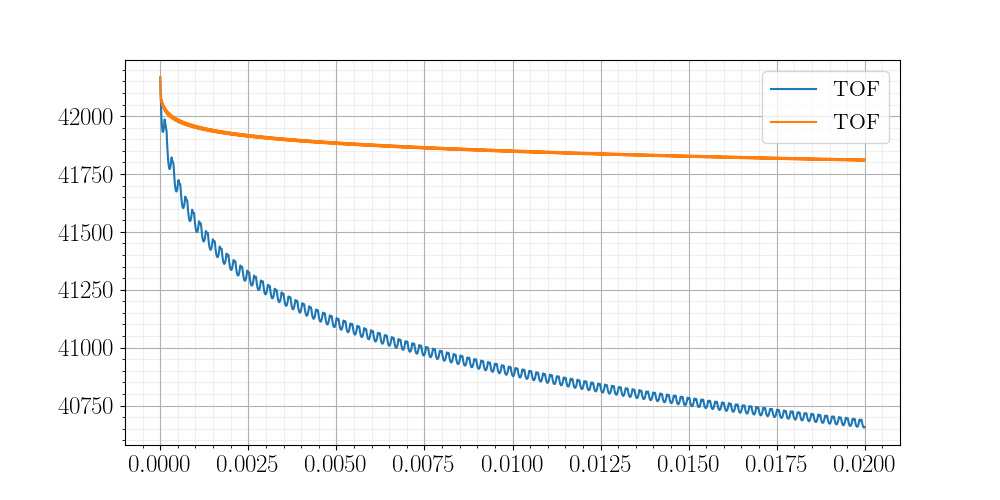

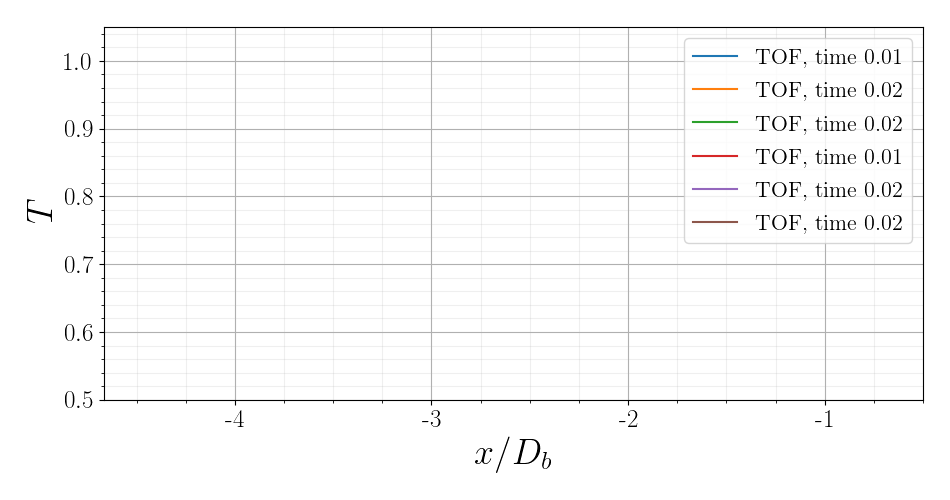

In [29]:
t_fin = 0.02
fig1, ax1 = plt.subplots(1)
a = Plotter("decale")
num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="weno", time_scheme="rk4", phy_prop=phy_prop
)
print()
prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob_ref.energy
# print(prob_ref.name)
print("==========================")
t, e = prob_ref.timestep(
    t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a
)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_ref.name)
n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult

num_prop = NumericalProperties(
    dx=5 * 10**-6, schema="weno", time_scheme="rk4", phy_prop=phy_prop
)
print()
prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob_ref.energy
# print(prob_ref.name)
print("==========================")
t, e = prob_ref.timestep(
    t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a
)
a.ax.set_ylim(0.5, 1.05)
a.ax.set_xlim(0.0, phy_prop.Delta / 4.0)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_ref.name)
ax1.legend()
ax1.grid(b=True, which="major")
ax1.minorticks_on()
ax1.grid(b=True, which="minor", alpha=0.2)
n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %f" % dedt_adim)



TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
dE*/dt* = -0.000055


TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
dE*/dt* = -0.000056


TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
dE*/dt* = -0.000002


TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
dE*/dt* = -0.000005


TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
dE*/dt* = -0.000021


TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
dE*/dt* = -0.000022


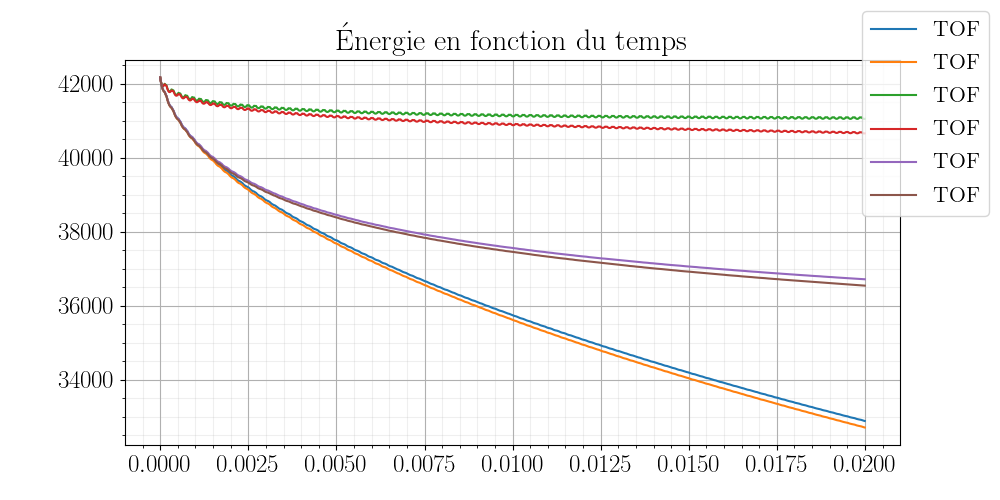

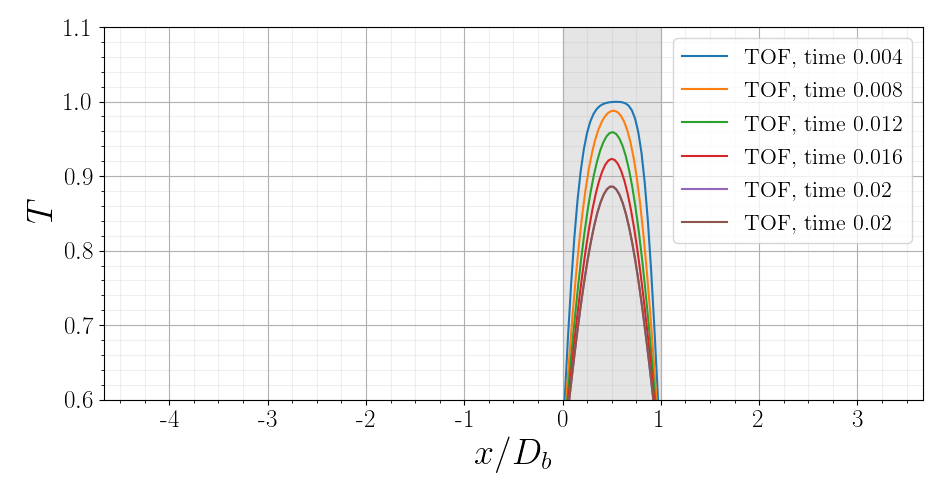

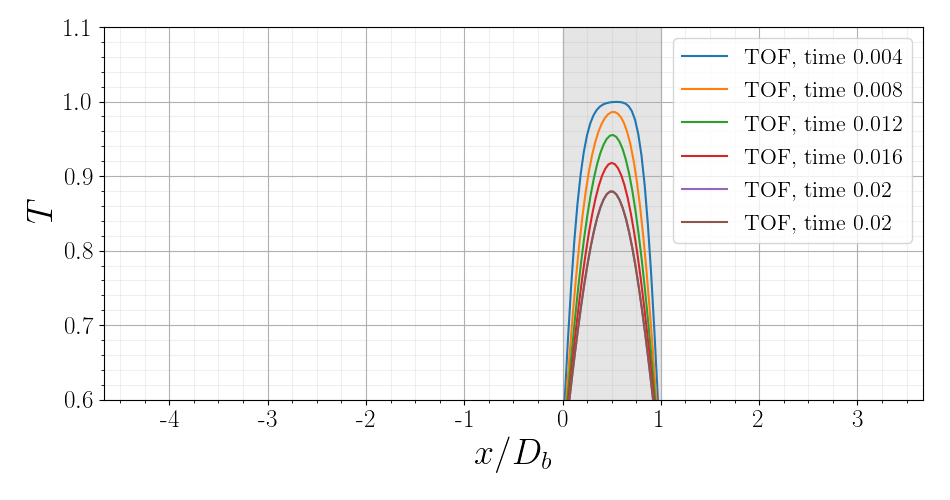

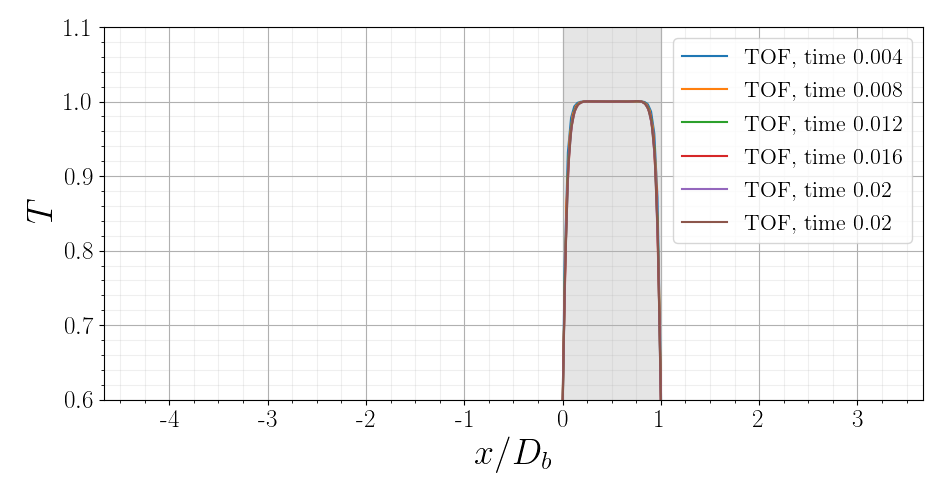

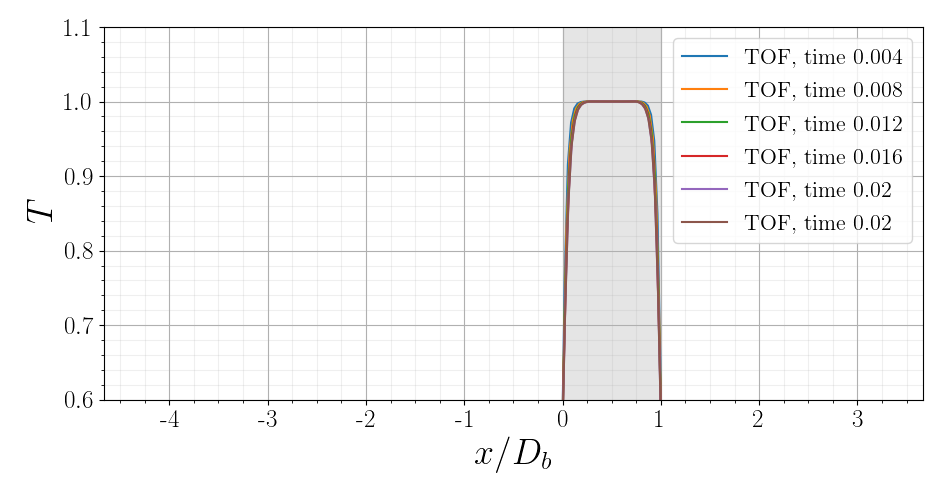

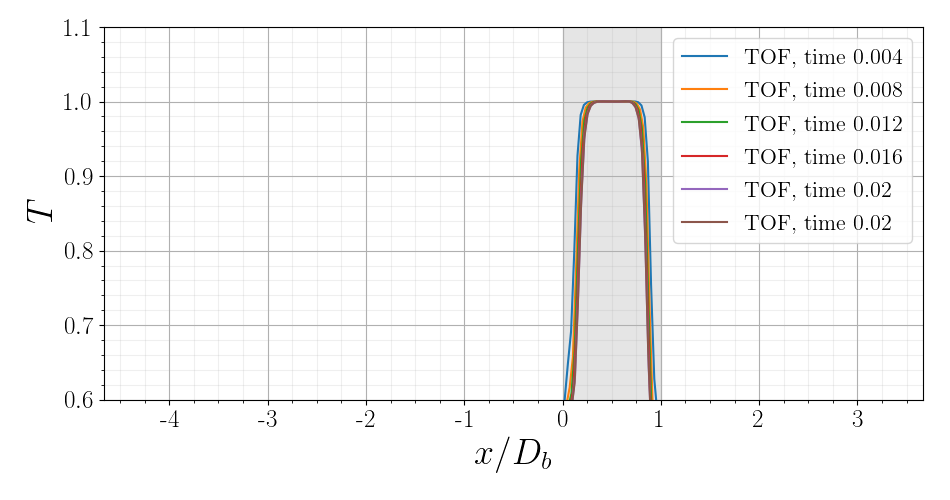

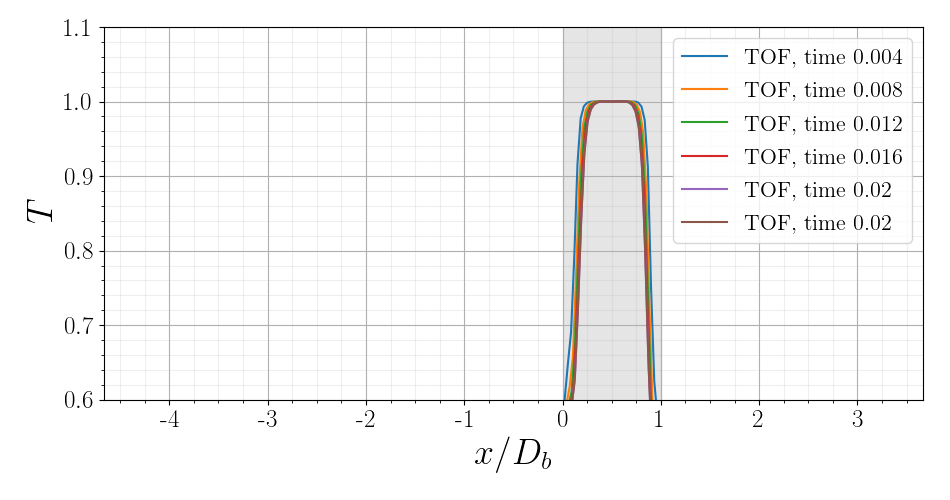

In [30]:
t_fin = 0.02
Schemas = ["upwind", "weno", "weno upwind"]
compare_energy_schema(Schemas, Problem, Time_scheme, phy_prop, markers, t_fin)

In [31]:
Schemas = ["upwind", "weno", "weno upwind"]
Time_scheme = ["euler", "rk4"]
compare_energy_schema(Schemas, ProblemConserv2, Time_scheme, phy_prop, markers, t_fin)

NameError: name 'ProblemConserv2' is not defined

# Profiling du code

In [ ]:
from line_profiler import LineProfiler

num_prop = NumericalProperties(
    dx=3.9 * 10**-5,
    schema="quick",
    time_scheme="euler",
    phy_prop=phy_prop,
)
lp = LineProfiler()
func = [
    Problem._euler_timestep,
    Bulles.indicatrice_liquide,
    Problem._compute_convection_flux,
    Problem._compute_diffusion_flux,
]
for fu in func:
    lp.add_function(fu)  # add additional function to profile
prob = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
# lp_wrapper = lp(compare_energy_forme)
lp_wrapper = lp(prob.timestep)
lp_wrapper(n=10000, t_fin=0.02, number_of_plots=1, plotter=Plotter("classic"))
lp.print_stats()

# Comparaison des meilleurs cas pour chaque formulation

In [ ]:
t_fin = 0.2
fig1, ax1 = plt.subplots(1)

for dx in [2 * 10**-5, 4 * 10**-5, 7 * 10**-5, 10 * 10**-5]:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
    a = Plotter("decale")
    num_prop = NumericalProperties(
        dx=dx, schema="weno", time_scheme="rk4", phy_prop=phy_prop
    )
    print()
    prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy_m
    # print(prob_ref.name)
    print("==========================")
    t, e = prob_ref.timestep(
        t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a
    )
    l = ax1.plot(t, e, label=prob_ref.name)
    n = len(e)
    i0 = int(n / 5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
    print("dE/dt = %g" % dedt_adim)

    num_prop = NumericalProperties(
        dx=dx, schema="weno upwind", time_scheme="rk4", phy_prop=phy_prop
    )
    print()
    prob_ref = ProblemConserv2(
        get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop
    )
    E0 = prob_ref.energy_m
    # print(prob_ref.name)
    print("==========================")
    t, e = prob_ref.timestep(
        t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a
    )
    l = ax1.plot(t, e, label=prob_ref.name)
    n = len(e)
    i0 = int(n / 5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt
    print("dE/dt = %g" % dedt_adim)

    a.ax.set_ylim(0.0, 1.05)
    a.ax.set_xlim(0.0, phy_prop.Delta / 4.0)
    ax1.legend()
    ax1.grid(b=True)

In [ ]:
# markers.shift(10**-6 / 7.0)

In [ ]:
# %matplotlib inline
# rc('figure', figsize=(10,7))
# rc('figure', dpi=100)
n_ = 10**5
t_fin = 10**-6
fig1, ax1 = plt.subplots(1)

for dx in [5 * 10**-6]:  # , 4*10**-6, 3*10**-6, 2*10**-6, 1*10**-6]:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
    a = Plotter("decale")
    num_prop = NumericalProperties(
        dx=dx, schema="weno", time_scheme="rk4", phy_prop=phy_prop
    )
    print()
    prob_ref = Problem(
        get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop
    )
    E0 = prob_ref.energy
    # print(prob_ref.name)
    print("==========================")
    t, e = prob_ref.timestep(n=min(n, n_max), t_fin=t_fin, number_of_plots=1, plotter=a)
    l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_ref.name)
    n = len(e)
    i0 = int(n / 5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
    print("dE/dt = %g" % dedt_adim)

    num_prop = NumericalProperties(
        dx=dx, schema="weno upwind", time_scheme="rk4", phy_prop=phy_prop
    )
    print()
    prob_ref = ProblemConserv2(
        get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop
    )
    E0 = prob_ref.energy
    # print(prob_ref.name)
    print("==========================")
    t, e = prob_ref.timestep(
        t_fin=t_fin, n=min(n_, n_max), number_of_plots=1, plotter=a
    )
    l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_ref.name)
    n = len(e)
    i0 = int(n / 5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt
    print("dE/dt = %g" % dedt_adim)

    a.ax.set_ylim(0.94, 1.02)
    a.ax.set_xlim(
        prob_ref.bulles.markers[0][0] - prob_ref.bulles.diam / 4.0,
        prob_ref.bulles.markers[0][0] + prob_ref.bulles.diam / 2.0,
    )
    ax1.legend()
#     ax1.grid(b=True, which='both')

if save_fig:
    a.fig.savefig(savefig_path + "comparaison_energie_temperature.pdf")

## Étude selon la formulation de l'équation

En fait s'il n'y a pas de convection il n'y a pas de différence entre les différentes formes, à l'exception de la moyenne utilisée pour $\frac{1}{\rho C_p}$

In [ ]:
# def compare_energy_forme(formu, phy_prop, num_prop, markers, t_fin, t_list=None):
#     fig1, ax1 = plt.subplots(1)
#     ax1.set_title("Énergie en fonction du temps")
#     for form in formu:
#         print()
#         prob = form(
#             get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop
#         )
#         if t_list is not None:
#             t_list.append(prob.dt)
#         E0 = prob.energy
#         # print(prob.name)
#         print("==========================")
#         t, e = prob.timestep(
#             t_fin=t_fin,
#             n=min(n_max, n_lim),
#             number_of_plots=5,
#             debug=None,
#             plotter=Plotter("decale", ispretty=False),
#         )
#         l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
#         n = len(e)
#         i0 = int(n / 5)
#         dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
#         # par Dt / rho_cp_l T_l V
#         print("dE*/dt* = %g" % dedt_adim)
#     le = fig1.legend()
#     ax1.grid(b=True, which="major")
#     ax1.minorticks_on()
#     ax1.grid(b=True, which="minor", alpha=0.2)
#     fig1.tight_layout()
#     return e[-1] - e[0]

### RK4

In [ ]:
num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="weno", time_scheme="rk4", phy_prop=phy_prop, cfl=0.5
)
compare_energy_forme([Problem], phy_prop, num_prop, markers, t_fin)

In [ ]:
num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="weno", time_scheme="rk4", phy_prop=phy_prop, cfl=0.5
)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

### Euler

In [ ]:
num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="weno", time_scheme="euler", phy_prop=phy_prop
)

In [ ]:
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Cas boniou, euler avec weno et upwind quand le stencil traverse l'interface

In [ ]:
num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="weno upwind", time_scheme="euler", phy_prop=phy_prop
)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)